# PCA

In a study measuring flow dynamics in rivers, researchers set up four measuring points. After six measuring trials they come to you with the following results:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

% matplotlib inline

In [2]:
X = np.array([[210,209,-116,-249,174,190],
              [277, 89,-105,-189, 79, 82],
              [-66,122, -13, -59, 95,107],
              [486,296,-219,-439,253,273]]).T

### a)

The researchers wonder if they could reduce the dimensionality of the problem using PCA for their subsequent data analysis. How many dimensions should they focus on? What would you recommend and why?


In [3]:
(n,D) = np.shape(X)

# sample covariance matrix
sample_cov = 1 / (n - 1) * X.T @ X

# EVD of the sample covariance matrix
(Lambda, V) = np.linalg.eigh(sample_cov)

In [4]:
print('eigenvalues:', Lambda)

print('eigenvalues proportions:', Lambda/np.sum(Lambda))

eigenvalues: [2.45418243e-11 1.32636486e+00 9.71361266e+03 2.14359261e+05]
eigenvalues proportions: [1.09525435e-16 5.91931091e-06 4.33499825e-02 9.56644098e-01]


$$
\begin{align}
& \text{ biggest eigenvalue: } 2.14 \times 10^5\\
\rightarrow & \text{ explains approximately 95 percent of the variance } \\
& \text{ second biggest eigenvalue: } 9.71 \times 10^3 \\
\rightarrow & \text{ explains approximately 4 percent of the variance }  \\
\Rightarrow & \text{ The researchers should focus on one, maybe two, dimensions.} \\
\end{align}
$$

## PCA (code from last exercise)

In [6]:
def my_pca(X, d):
    D, n = np.shape(X)
    
    # sample covariance matrix
    sample_cov = 1/n * X@X.T
    
    # EVD
    Lambda, V = np.linalg.eigh(sample_cov)

    # picking the d largest eigenvalues and corresponding eigenvectors
    indices = np.arange(D-d, D, 1)
    Lambda_d = Lambda[indices]
    V_d = V[:,indices]
    
    Z = V_d.T @ X
    
    Z_w = np.linalg.inv(np.diag(np.sqrt(Lambda_d))) @ Z   # whitening
    return(Z, Z_w)



### b)

Perform PCA and reduce the dimensionality of the given data. Plot your results.

In [6]:
(Z1, Z1_w) = my_pca(X.T, 1)
(Z2, Z2_w) = my_pca(X.T, 2)


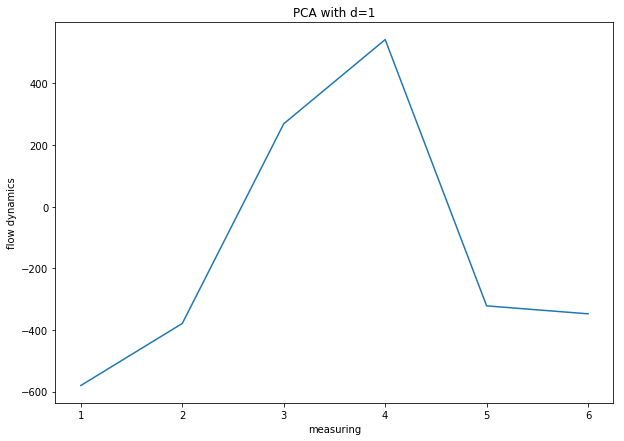

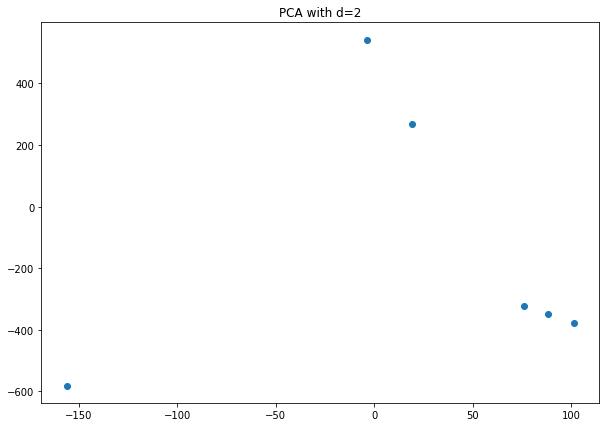

In [19]:
# plot result for d=1
plt.figure(figsize=(10,7))
plt.title('PCA with d=1')
plt.xlabel('measuring')
plt.ylabel('flow dynamics')
plt.plot([1,2,3,4,5,6],Z1.T)

# plot result for d=2
plt.figure(figsize=(10,7))
plt.title('PCA with d=2')
plt.scatter(Z2[0], Z2[1])
